In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [3]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #forprop
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        #backprop
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

    # query the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [6]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [7]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [28]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9734


In [42]:
import imageio
import glob

own_x = []
own_y = []
i = 0

for image_file_name in glob.glob('my_own_images/KakaoTalk_20211213_*.png'):
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data  = 255.0 - img_array.reshape(784)  # flatten
    img_data = (img_data / 255.0 * 0.99) + 0.01 # scaling

    own_x.append(img_data)
    own_y.append((i-(i%6))/6)
    i += 1
    pass

loading ...  my_own_images\KakaoTalk_20211213_010521868.png
0.01
0.7864706
loading ...  my_own_images\KakaoTalk_20211213_010522356.png
0.048823528
1.0
loading ...  my_own_images\KakaoTalk_20211213_010522706.png
0.01
1.0
loading ...  my_own_images\KakaoTalk_20211213_010523106.png
0.01
1.0
loading ...  my_own_images\KakaoTalk_20211213_010523498.png
0.01
1.0
loading ...  my_own_images\KakaoTalk_20211213_010523909.png
0.01
1.0
loading ...  my_own_images\KakaoTalk_20211213_010524270.png
0.01
0.8136471
loading ...  my_own_images\KakaoTalk_20211213_010524578.png
0.01
1.0
loading ...  my_own_images\KakaoTalk_20211213_010524906.png
0.01
1.0
loading ...  my_own_images\KakaoTalk_20211213_010525314.png
0.14588237
1.0
loading ...  my_own_images\KakaoTalk_20211213_010525318.png
0.14588237
1.0
loading ...  my_own_images\KakaoTalk_20211213_010525615.png
0.01
0.99611765
loading ...  my_own_images\KakaoTalk_20211213_010525993.png
0.01
0.76705885
loading ...  my_own_images\KakaoTalk_20211213_010526364.pn

[[0.0156395 ]
 [0.01875259]
 [0.00906957]
 [0.05525103]
 [0.00577452]
 [0.45016578]
 [0.02860201]
 [0.00568849]
 [0.04880554]
 [0.09902202]]
network says  5
no match!


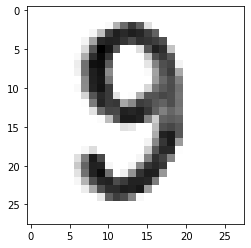

In [47]:
# test the neural network with our own images
item = 57
# plot image
matplotlib.pyplot.imshow(own_x[item][:].reshape(28,28), cmap='Greys', interpolation='None')

correct_label = own_y[item]
inputs = own_x[item][:]

outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass


In [52]:
# record to test
sum = 0
for i in range(0,60):
    # correct answer is first value
    correct_label = own_y[i]
    # data is remaining values
    inputs = own_x[i][:]

    # query the network
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        sum+=1
    else:
        pass
print(sum/60)

0.6333333333333333


In [53]:
# ASSIGNMENT 1.
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1
lr1_test_acc=[]
for epochs in [1,3,5,10,15]:
    # create instance of neural network
    n1 = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
    # train the neural network
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n1.train(inputs, targets)
            pass
        pass
    # record to test
    sum = 0
    for i in range(0,60):
        correct_label = own_y[i]
        inputs = own_x[i][:]
        outputs = n1.query(inputs)
        label = numpy.argmax(outputs)
        if (label == correct_label):
            sum+=1
        else:
            pass
    lr1_test_acc.append(sum/60.0)
    print(sum/60.0)
print(lr1_test_acc)

learning_rate = 0.2
lr2_test_acc=[]
for epochs in [1,3,5,10,15]:
    # create instance of neural network
    n2 = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
    # train the neural network
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n2.train(inputs, targets)
            pass
        pass

    # record to test
    sum = 0
    for i in range(0,60):
        correct_label = own_y[i]
        inputs = own_x[i][:]
        outputs = n2.query(inputs)
        label = numpy.argmax(outputs)
        if (label == correct_label):
            sum+=1
        else:
            pass
    lr2_test_acc.append(sum/60.0)
    print(sum/60.0)
print(lr2_test_acc)

0.6
0.6333333333333333
0.6166666666666667
0.6166666666666667
0.5666666666666667
[0.6, 0.6333333333333333, 0.6166666666666667, 0.6166666666666667, 0.5666666666666667]
0.6
0.5833333333333334
0.5833333333333334
0.5333333333333333
0.4666666666666667
[0.6, 0.5833333333333334, 0.5833333333333334, 0.5333333333333333, 0.4666666666666667]


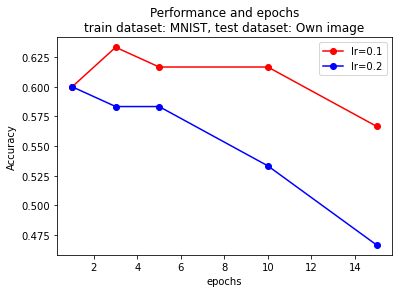

In [66]:
import matplotlib.pyplot as plt

plt.plot([1,3,5,10,15],lr1_test_acc,'ro-', label = 'lr=0.1')
plt.plot([1,3,5,10,15],lr2_test_acc,'bo-', label = 'lr=0.2')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Performance and epochs\ntrain dataset: MNIST, test dataset: Own image")
plt.legend()

In [125]:
train_dataset_rotate = []
for angle in [5,10,15,20,25]:
    train=[[],[],[],[],[],[],[],[],[],[]]
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        labels = [int(all_values[0])]
        inputs = numpy.hstack([labels, inputs])
        train[labels[0]].append(inputs)
    
    for i in range(0,10):
        rotate_images = []
        for data in train[i][:1000]:
            rotate_ = scipy.ndimage.interpolation.rotate(data[1:].reshape(28,28), angle, cval=0.01, order=1, reshape=False)
            rotate = scipy.ndimage.interpolation.rotate(data[1:].reshape(28,28), -angle, cval=0.01, order=1, reshape=False)
            rotate_ = numpy.hstack([[data[0]], rotate_.reshape(784)])
            rotate = numpy.hstack([[data[0]], rotate.reshape(784)])
            rotate_images.append(rotate)
            rotate_images.append(rotate_)
        train[i].extend(rotate_images)
    train_dataset_rotate.append(numpy.concatenate(train))
print(len(train_dataset_rotate[0])) # degree 5, -5 rotated dataset

80000


In [124]:
import scipy.ndimage

test_lst_e5 = []
test_lst_e10 =[]

for train_dataset in train_dataset_rotate:
    input_nodes = 784
    hidden_nodes = 200
    output_nodes = 10
    learning_rate = 0.1

    epochs = 10
    n3 = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
    for e in range(epochs):
        for record in train_dataset:
            inputs = record[1:]
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(record[0])] = 0.99
            n3.train(inputs, targets)

        # record to test
        sum = 0
        for record in test_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            correct_label = int(all_values[0])
            outputs = n3.query(inputs)
            if (numpy.argmax(outputs) == correct_label):
                sum+=1
            else:
                pass
        print("epoch: ", e+1, "angle: ", angle, "test accuracy: ", sum/10000)
        if(e == 4):
            test_lst_e5.append(sum/10000)
        elif(e==9):
            test_lst_e10.append(sum/10000)            
            

epoch:  1 angle:  25 test accuracy:  0.1009
epoch:  2 angle:  25 test accuracy:  0.1009
epoch:  3 angle:  25 test accuracy:  0.1009
epoch:  4 angle:  25 test accuracy:  0.1009
epoch:  5 angle:  25 test accuracy:  0.1009
epoch:  6 angle:  25 test accuracy:  0.1009


KeyboardInterrupt: 

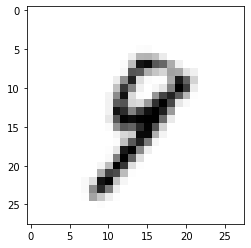

In [121]:
matplotlib.pyplot.imshow(train_dataset_rotate[-10][1:].reshape(28,28), cmap='Greys', interpolation='None')

In [129]:
test_lst_e10 = [0.832, 0.88, 0.855, 0.843, 0.820]
test_lst_e5 = [0.790, 0.820, 0.81, 0.788, 0.750]

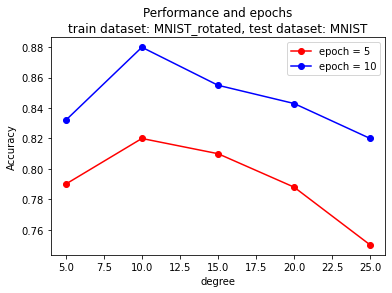

In [130]:
import matplotlib.pyplot as plt

plt.plot([5,10,15,20,25],test_lst_e5,'ro-', label = 'epoch = 5')
plt.plot([5,10,15,20,25],test_lst_e10,'bo-', label = 'epoch = 10')
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.title("Performance and epochs\ntrain dataset: MNIST_rotated, test dataset: MNIST")
plt.legend()

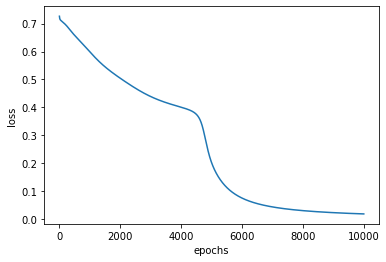

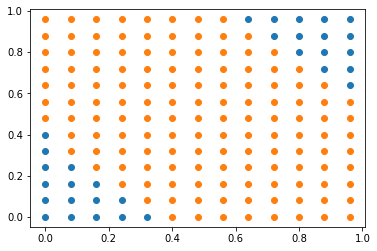

In [134]:
# assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys

inputs = np.array([[0,1], [1,0], [1,1], [0,0]])
target = np.array([[1], [1], [0], [0]])
input_node = 2
hidden_node = 2
output_node = 1
lr = 0.1
a = 0
epochs = 10000
m = 4

np.random.seed(1)

h_w = np.random.normal(0, 1, (hidden_node, input_node))
o_w = np.random.normal(0, 1, (output_node, hidden_node))
h_b = np.random.random((hidden_node, 1))
o_b = np.random.random((output_node, 1))

def sigmoid(z, deriv = False):
    if deriv:
        return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward_propagation(inputs, predict=False):
    i_output = inputs.reshape(inputs.shape[0], 1)
    
    h_activation = h_w.dot(i_output) + h_b
    h_output = sigmoid(h_activation)
    
    o_activation = o_w.dot(h_output) + o_b
    actual_output = sigmoid(o_activation)
    
    return (i_output, h_output, actual_output)

d_h_w = 0
d_o_w = 0
d_h_b = 0
d_o_b = 0

loss = np.zeros((epochs, 1))

def training(h_w, o_w, h_b, o_b):
    for epoch in range(epochs):
        c = 0
        
        d_h_w = 0
        d_o_w = 0
        d_h_b = 0
        d_o_b = 0
        
        for i in range(m):
            #forward propagation
            i_output, h_output, actual_output = forward_propagation(inputs[i])
            
            #back propagation
            d_o_activation = actual_output - target[i]
            d_o_w += d_o_activation * h_output.T
            
            d_h_activation = np.multiply((o_w.T * d_o_activation), sigmoid(h_output, deriv = True))
            d_h_w += d_h_activation.dot(i_output.T)
            
            d_h_b += d_h_activation
            d_o_b += d_o_activation
            
            c += (-(target[i] * np.log(actual_output)) - ((1 - target[i]) * np.log(1 - actual_output)))
            
        h_w += - lr * (d_h_w / m) + ((a/m)*h_w)
        o_w += - lr * (d_o_w / m) + ((a/m)*o_w)
        
        h_b += - lr * (d_h_b / m)
        o_b += - lr * (d_o_b / m)
        
        loss[epoch] = (c / m) + (a/(2*m)) * (np.sum(np.power(d_h_w, 2)) + np.sum(np.power(d_o_w, 2)))
        
    return h_w, o_w, h_b, o_b   
h_w, o_w, h_b, o_b = training(h_w, o_w, h_b, o_b)
plt.plot(range(epochs), loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

x1 = np.arange(0, 1, 0.08)
x2 = np.arange(0, 1, 0.08)

neg_plot_x = []
neg_plot_y = []
pos_plot_x = []
pos_plot_y = []

for x_1 in x1:
    for x_2 in x2:
        h = sigmoid(h_w.dot(np.array([x_1, x_2]).reshape(2, 1)) + h_b)
        y_ = sigmoid(o_w.dot(h) + o_b)
        
        if (y_ < float(0.5)):
            neg_plot_x.append(x_1)
            neg_plot_y.append(x_2)
        else:
            pos_plot_x.append(x_1)
            pos_plot_y.append(x_2)
            
plt.scatter(neg_plot_x, neg_plot_y)
plt.scatter(pos_plot_x, pos_plot_y)
# reference https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d